In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.listdir('./NBA/')

['games.csv', 'games_details.csv', 'players.csv', 'ranking.csv', 'teams.csv']

In [3]:
games = pd.read_csv('./NBA/games.csv')
details = pd.read_csv('./NBA/games_details.csv', low_memory=False)
teams = pd.read_csv('./NBA/teams.csv')
players = pd.read_csv('./NBA/players.csv')
ranking = pd.read_csv('./NBA/ranking.csv')

In [4]:
print(f'La BBDD de detalles de juegoss tiene {details.shape[0]} filas y {details.shape[1]} columnas')
print('')
print(f'La BBDD de juegos tiene {games.shape[0]} filas y {games.shape[1]} columnas')
print('')
print(f'La BBDD de rendimiento de jugadores tiene {players.shape[0]} filas y {players.shape[1]} columnas')
print('')
print(f'La BBDD de ranking tiene {ranking.shape[0]} filas y {ranking.shape[1]} columnas')
print('')
print(f'La BBDD de equipos tiene {teams.shape[0]} filas y {teams.shape[1]} columnas')

La BBDD de detalles de juegoss tiene 668628 filas y 29 columnas

La BBDD de juegos tiene 26651 filas y 21 columnas

La BBDD de rendimiento de jugadores tiene 7228 filas y 4 columnas

La BBDD de ranking tiene 210342 filas y 13 columnas

La BBDD de equipos tiene 30 filas y 14 columnas


In [5]:
print(details.shape[0])
print(details.shape[1])
print(games.shape[0])
print(games.shape[1])
print(players.shape[0])
print(players.shape[1])
print(ranking.shape[0])
print(ranking.shape[1])
print(teams.shape[0])
print(teams.shape[1])

668628
29
26651
21
7228
4
210342
13
30
14


In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 non-null  float6

In [7]:
games

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26646,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
26647,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
26648,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
26649,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [8]:
games.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [9]:
games = games[
    ['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'TEAM_ID_home', 'PTS_home', 'TEAM_ID_away','PTS_away', 'HOME_TEAM_WINS']
]

In [10]:
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,PTS_home,TEAM_ID_away,PTS_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,126.0,1610612759,117.0,1
1,2022-12-22,22200478,Final,1610612762,120.0,1610612764,112.0,1
2,2022-12-21,22200466,Final,1610612739,114.0,1610612749,106.0,1
3,2022-12-21,22200467,Final,1610612755,113.0,1610612765,93.0,1
4,2022-12-21,22200468,Final,1610612737,108.0,1610612741,110.0,0


In [11]:
games['GAME_DATE_EST'] = pd.to_datetime(games['GAME_DATE_EST'])

C:\Users\mathi\AppData\Local\Temp\ipykernel_4656\3013542192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['GAME_DATE_EST'] = pd.to_datetime(games['GAME_DATE_EST'])


In [12]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   GAME_DATE_EST     26651 non-null  datetime64[ns]
 1   GAME_ID           26651 non-null  int64         
 2   GAME_STATUS_TEXT  26651 non-null  object        
 3   TEAM_ID_home      26651 non-null  int64         
 4   PTS_home          26552 non-null  float64       
 5   TEAM_ID_away      26651 non-null  int64         
 6   PTS_away          26552 non-null  float64       
 7   HOME_TEAM_WINS    26651 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 1.6+ MB


In [13]:
games['year'] = games['GAME_DATE_EST'].dt.year
games.head()

C:\Users\mathi\AppData\Local\Temp\ipykernel_4656\2731727031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['year'] = games['GAME_DATE_EST'].dt.year


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,PTS_home,TEAM_ID_away,PTS_away,HOME_TEAM_WINS,year
0,2022-12-22,22200477,Final,1610612740,126.0,1610612759,117.0,1,2022
1,2022-12-22,22200478,Final,1610612762,120.0,1610612764,112.0,1,2022
2,2022-12-21,22200466,Final,1610612739,114.0,1610612749,106.0,1,2022
3,2022-12-21,22200467,Final,1610612755,113.0,1610612765,93.0,1,2022
4,2022-12-21,22200468,Final,1610612737,108.0,1610612741,110.0,0,2022


In [14]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LEAGUE_ID           30 non-null     int64  
 1   TEAM_ID             30 non-null     int64  
 2   MIN_YEAR            30 non-null     int64  
 3   MAX_YEAR            30 non-null     int64  
 4   ABBREVIATION        30 non-null     object 
 5   NICKNAME            30 non-null     object 
 6   YEARFOUNDED         30 non-null     int64  
 7   CITY                30 non-null     object 
 8   ARENA               30 non-null     object 
 9   ARENACAPACITY       26 non-null     float64
 10  OWNER               30 non-null     object 
 11  GENERALMANAGER      30 non-null     object 
 12  HEADCOACH           30 non-null     object 
 13  DLEAGUEAFFILIATION  30 non-null     object 
dtypes: float64(1), int64(5), object(8)
memory usage: 3.4+ KB


In [15]:
teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


In [16]:
teams.columns

Index(['LEAGUE_ID', 'TEAM_ID', 'MIN_YEAR', 'MAX_YEAR', 'ABBREVIATION',
       'NICKNAME', 'YEARFOUNDED', 'CITY', 'ARENA', 'ARENACAPACITY', 'OWNER',
       'GENERALMANAGER', 'HEADCOACH', 'DLEAGUEAFFILIATION'],
      dtype='object')

In [17]:
teams = teams[['TEAM_ID', 'NICKNAME', 'CITY']]
teams.head()

,TEAM_ID,NICKNAME,CITY
0,1610612737,Hawks,Atlanta
1,1610612738,Celtics,Boston
2,1610612740,Pelicans,New Orleans
3,1610612741,Bulls,Chicago
4,1610612742,Mavericks,Dallas


In [18]:
df1 = pd.DataFrame({'key': ['A', 'B', 'C', 'D'], 'value': [1, 2, 3, 4]})
df2 = pd.DataFrame({'key': ['B', 'D', 'E', 'F'], 'value': [5, 6, 7, 8]})

In [19]:
df1

,key,value
0,A,1
1,B,2
2,C,3
3,D,4


In [20]:
df2

,key,value
0,B,5
1,D,6
2,E,7
3,F,8


In [21]:
merged_df = pd.merge(df1, df2, on='key', how='inner')
merged_df

,key,value_x,value_y
0,B,2,5
1,D,4,6


In [22]:
home_games = pd.merge(games, teams, left_on='TEAM_ID_home', right_on='TEAM_ID', how='inner')
home_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,PTS_home,TEAM_ID_away,PTS_away,HOME_TEAM_WINS,year,TEAM_ID,NICKNAME,CITY
0,2022-12-22,22200477,Final,1610612740,126.0,1610612759,117.0,1,2022,1610612740,Pelicans,New Orleans
1,2022-12-22,22200478,Final,1610612762,120.0,1610612764,112.0,1,2022,1610612762,Jazz,Utah
2,2022-12-21,22200466,Final,1610612739,114.0,1610612749,106.0,1,2022,1610612739,Cavaliers,Cleveland
3,2022-12-21,22200467,Final,1610612755,113.0,1610612765,93.0,1,2022,1610612755,76ers,Philadelphia
4,2022-12-21,22200468,Final,1610612737,108.0,1610612741,110.0,0,2022,1610612737,Hawks,Atlanta


In [23]:
home_games = home_games.rename(columns={'CITY': 'city_home', 'NICKNAME': 'nickname_home'})
home_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,PTS_home,TEAM_ID_away,PTS_away,HOME_TEAM_WINS,year,TEAM_ID,nickname_home,city_home
0,2022-12-22,22200477,Final,1610612740,126.0,1610612759,117.0,1,2022,1610612740,Pelicans,New Orleans
1,2022-12-22,22200478,Final,1610612762,120.0,1610612764,112.0,1,2022,1610612762,Jazz,Utah
2,2022-12-21,22200466,Final,1610612739,114.0,1610612749,106.0,1,2022,1610612739,Cavaliers,Cleveland
3,2022-12-21,22200467,Final,1610612755,113.0,1610612765,93.0,1,2022,1610612755,76ers,Philadelphia
4,2022-12-21,22200468,Final,1610612737,108.0,1610612741,110.0,0,2022,1610612737,Hawks,Atlanta


In [24]:
both_games = pd.merge(home_games, teams, left_on='TEAM_ID_away', right_on='TEAM_ID', how='inner')
both_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,PTS_home,TEAM_ID_away,PTS_away,HOME_TEAM_WINS,year,TEAM_ID_x,nickname_home,city_home,TEAM_ID_y,NICKNAME,CITY
0,2022-12-22,22200477,Final,1610612740,126.0,1610612759,117.0,1,2022,1610612740,Pelicans,New Orleans,1610612759,Spurs,San Antonio
1,2022-12-22,22200478,Final,1610612762,120.0,1610612764,112.0,1,2022,1610612762,Jazz,Utah,1610612764,Wizards,Washington
2,2022-12-21,22200466,Final,1610612739,114.0,1610612749,106.0,1,2022,1610612739,Cavaliers,Cleveland,1610612749,Bucks,Milwaukee
3,2022-12-21,22200467,Final,1610612755,113.0,1610612765,93.0,1,2022,1610612755,76ers,Philadelphia,1610612765,Pistons,Detroit
4,2022-12-21,22200468,Final,1610612737,108.0,1610612741,110.0,0,2022,1610612737,Hawks,Atlanta,1610612741,Bulls,Chicago


In [25]:
both_games = both_games.rename(columns={'CITY': 'city_away', 'NICKNAME': 'nickname_away'})
both_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,PTS_home,TEAM_ID_away,PTS_away,HOME_TEAM_WINS,year,TEAM_ID_x,nickname_home,city_home,TEAM_ID_y,nickname_away,city_away
0,2022-12-22,22200477,Final,1610612740,126.0,1610612759,117.0,1,2022,1610612740,Pelicans,New Orleans,1610612759,Spurs,San Antonio
1,2022-12-22,22200478,Final,1610612762,120.0,1610612764,112.0,1,2022,1610612762,Jazz,Utah,1610612764,Wizards,Washington
2,2022-12-21,22200466,Final,1610612739,114.0,1610612749,106.0,1,2022,1610612739,Cavaliers,Cleveland,1610612749,Bucks,Milwaukee
3,2022-12-21,22200467,Final,1610612755,113.0,1610612765,93.0,1,2022,1610612755,76ers,Philadelphia,1610612765,Pistons,Detroit
4,2022-12-21,22200468,Final,1610612737,108.0,1610612741,110.0,0,2022,1610612737,Hawks,Atlanta,1610612741,Bulls,Chicago


In [26]:
both_games = both_games.drop(columns=['TEAM_ID_home', 'TEAM_ID_away', 'TEAM_ID_x', 'TEAM_ID_y', 'GAME_DATE_EST'])
both_games.head()

,GAME_ID,GAME_STATUS_TEXT,PTS_home,PTS_away,HOME_TEAM_WINS,year,nickname_home,city_home,nickname_away,city_away
0,22200477,Final,126.0,117.0,1,2022,Pelicans,New Orleans,Spurs,San Antonio
1,22200478,Final,120.0,112.0,1,2022,Jazz,Utah,Wizards,Washington
2,22200466,Final,114.0,106.0,1,2022,Cavaliers,Cleveland,Bucks,Milwaukee
3,22200467,Final,113.0,93.0,1,2022,76ers,Philadelphia,Pistons,Detroit
4,22200468,Final,108.0,110.0,0,2022,Hawks,Atlanta,Bulls,Chicago


In [27]:
games = both_games.copy()
games.columns = games.columns.str.lower()
games.head()

,game_id,game_status_text,pts_home,pts_away,home_team_wins,year,nickname_home,city_home,nickname_away,city_away
0,22200477,Final,126.0,117.0,1,2022,Pelicans,New Orleans,Spurs,San Antonio
1,22200478,Final,120.0,112.0,1,2022,Jazz,Utah,Wizards,Washington
2,22200466,Final,114.0,106.0,1,2022,Cavaliers,Cleveland,Bucks,Milwaukee
3,22200467,Final,113.0,93.0,1,2022,76ers,Philadelphia,Pistons,Detroit
4,22200468,Final,108.0,110.0,0,2022,Hawks,Atlanta,Bulls,Chicago


In [28]:
games['total_points'] = games['pts_home'] + games['pts_away']
games.head()

,game_id,game_status_text,pts_home,pts_away,home_team_wins,year,nickname_home,city_home,nickname_away,city_away,total_points
0,22200477,Final,126.0,117.0,1,2022,Pelicans,New Orleans,Spurs,San Antonio,243.0
1,22200478,Final,120.0,112.0,1,2022,Jazz,Utah,Wizards,Washington,232.0
2,22200466,Final,114.0,106.0,1,2022,Cavaliers,Cleveland,Bucks,Milwaukee,220.0
3,22200467,Final,113.0,93.0,1,2022,76ers,Philadelphia,Pistons,Detroit,206.0
4,22200468,Final,108.0,110.0,0,2022,Hawks,Atlanta,Bulls,Chicago,218.0


In [29]:
games['total_points'].isna().sum()

np.int64(99)

In [30]:
games.total_points.sort_values().dropna()

13632     69.0
19275    120.0
17807    124.0
16931    126.0
19137    129.0
         ...  
3349     302.0
969      310.0
19528    317.0
14727    318.0
20030    329.0
Name: total_points, Length: 26552, dtype: float64

In [31]:
games.nlargest(n=5, columns='total_points')

,game_id,game_status_text,pts_home,pts_away,home_team_wins,year,nickname_home,city_home,nickname_away,city_away,total_points
20030,21800928,Final,161.0,168.0,0,2019,Hawks,Atlanta,Bulls,Chicago,329.0
14727,20600271,Final,157.0,161.0,0,2006,Nets,Brooklyn,Suns,Phoenix,318.0
19528,21900061,Final,158.0,159.0,0,2019,Wizards,Washington,Rockets,Houston,317.0
969,22100899,Final,153.0,157.0,0,2022,Wizards,Washington,Spurs,San Antonio,310.0
3349,21901238,Final,149.0,153.0,0,2020,Mavericks,Dallas,Rockets,Houston,302.0


In [32]:
games.nsmallest(n=2, columns='total_points')

,game_id,game_status_text,pts_home,pts_away,home_team_wins,year,nickname_home,city_home,nickname_away,city_away,total_points
13632,10700072,Final,36.0,33.0,1,2007,Celtics,Boston,Nets,Brooklyn,69.0
19275,10300012,Final,62.0,58.0,1,2003,Pacers,Indiana,Bulls,Chicago,120.0


In [33]:
total = games['home_team_wins'].value_counts('%')
total

home_team_wins
1    0.587032
0    0.412968
Name: proportion, dtype: float64

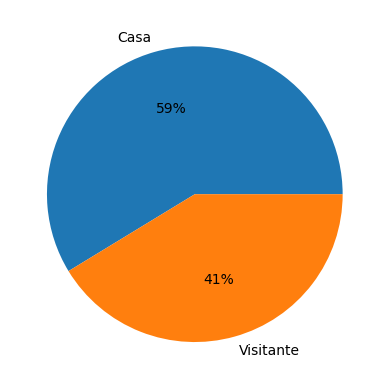

In [34]:
plt.pie(total.values, labels=['Casa', 'Visitante'], autopct='%.0f%%')
plt.show()

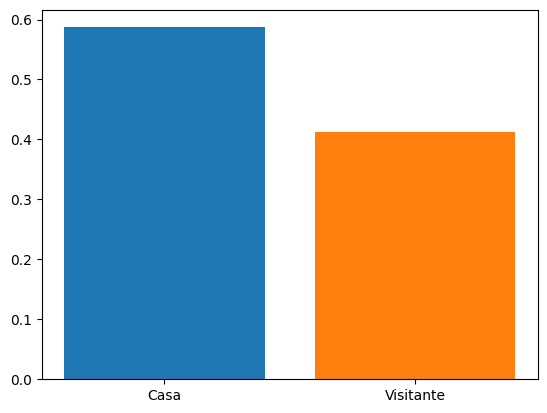

In [35]:
plt.bar(['Casa', 'Visitante'], total, color=['#1f77b4', '#ff7f0e'])
plt.show()